In [ ]:
import pandas as pd #carregamento da biblioteca
import plotly.express as px #carregamento da biblioteca - gráficos interativos
from sklearn.model_selection import train_test_split #carregamento da biblioteca - divisão de dados
from sklearn.neighbors import KNeighborsRegressor #carregamento da biblioteca - algoritmo de machine learning
from sklearn.tree import DecisionTreeRegressor #carregamento da biblioteca - algoritmo de machine learning
from sklearn.ensemble import RandomForestRegressor #carregamento da biblioteca - algoritmo de machine learning
from sklearn.metrics import r2_score #carregamento da biblioteca - métricas de desempenho
from sklearn.metrics import mean_absolute_error #carregamento da biblioteca  - métricas de desempenho
from sklearn.model_selection import GridSearchCV #carregamento da biblioteca - algoritmo de machine learning para tentar diminuir o overfitting

In [ ]:
df = pd.read_excel('/content/mediaMediana_2016_2024.xlsx')
df

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2016-01-01,0.691667,950.637500,950.941667,950.312500,116.80,24.375000,21.495833,24.950000,23.804167,21.787500,21.112500,86.458333,80.791667,84.125000,78.125000,5.037500,2.166667
1,2016-01-02,0.416667,951.245833,951.541667,950.908333,24.95,24.745833,21.687500,25.454167,24.275000,22.112500,21.308333,86.208333,80.500000,83.708333,140.916667,5.495833,2.125000
2,2016-01-03,0.050000,950.916667,951.233333,950.650000,145.25,24.341667,21.600000,24.762500,23.975000,21.979167,21.225000,87.000000,82.791667,85.125000,160.833333,4.320833,1.925000
3,2016-01-04,0.791667,951.000000,951.300000,950.670833,122.95,24.908333,22.137500,25.550000,24.391667,22.533333,21.720833,87.541667,82.000000,85.125000,69.500000,3.812500,1.454167
4,2016-01-05,0.800000,951.650000,951.975000,951.354167,110.95,24.537500,21.929167,25.083333,24.029167,22.320833,21.495833,88.291667,82.625000,85.750000,116.541667,4.108333,1.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,2024-09-26,0.016667,950.037500,950.225000,949.679167,22.50,27.679167,15.883333,28.845833,27.066667,16.275000,15.054167,52.791667,45.791667,50.625000,194.875000,6.770833,2.975000
3192,2024-09-27,0.000000,954.604167,954.891667,954.270833,37.80,22.408333,14.429167,22.995833,21.933333,15.054167,14.229167,67.000000,62.583333,64.125000,162.458333,8.662500,4.487500
3193,2024-09-28,0.000000,953.487500,953.787500,953.245833,54.65,25.525000,9.166667,26.075000,24.804167,9.820833,8.695833,40.125000,36.166667,37.875000,133.125000,5.883333,2.991667
3194,2024-09-29,0.000000,952.320833,952.650000,952.075000,50.00,28.816667,11.833333,29.429167,28.037500,12.250000,11.200000,38.125000,34.208333,36.333333,131.791667,7.466667,3.758333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   3196 non-null   datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       3196 non-null   float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  3196 non-null   float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        3196 non-null   float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       3196 non-null   float64       
 5   RADIACAO GLOBAL (Kj/m²)                                3196 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           3196 non-null   float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   3196 non-null 

<Axes: >

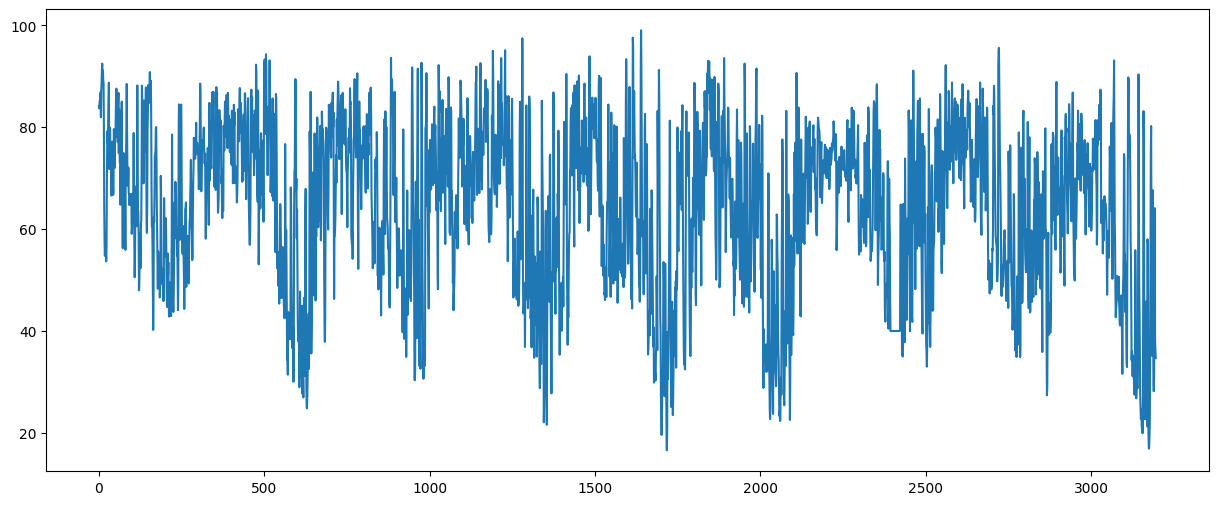

In [ ]:
df['UMIDADE RELATIVA DO AR, HORARIA (%)'].plot(figsize=(15,6))

KNN

In [ ]:
# df = df.drop(columns=['Data'])
# df

In [ ]:
# separar as variáveis em X e Y
x = df.drop('TEMPERATURA DO PONTO DE ORVALHO (°C)', axis=1)
y = df['TEMPERATURA DO PONTO DE ORVALHO (°C)']

In [ ]:
# divisão dos dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 3111 to 3174
Data columns (total 17 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   2237 non-null   datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       2237 non-null   float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  2237 non-null   float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        2237 non-null   float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       2237 non-null   float64       
 5   RADIACAO GLOBAL (Kj/m²)                                2237 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           2237 non-null   float64       
 7   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             2237 non-null   

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 2237 entries, 3111 to 3174
Series name: TEMPERATURA DO PONTO DE ORVALHO (°C)
Non-Null Count  Dtype  
--------------  -----  
2237 non-null   float64
dtypes: float64(1)
memory usage: 35.0 KB


In [ ]:
for column in x_train.columns:
    if pd.api.types.is_datetime64_any_dtype(x_train[column]):
        x_train[column] = x_train[column].astype('int64') // 10**9
    else:
        x_train[column] = x_train[column].astype(float)

y_train = y_train.astype(float)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_test

,TEMPERATURA DO PONTO DE ORVALHO (°C)
1951,11.800000
1204,19.695833
2661,20.200000
705,21.050000
1036,19.145833
...,...
100,19.116667
315,21.570833
1873,19.483333
2914,19.104167


In [ ]:
for column in x_test.columns:
    if pd.api.types.is_datetime64_any_dtype(x_test[column]):
        x_test[column] = x_test[column].astype('int64') // 10**9
    else:
        try:
            x_test[column] = x_test[column].astype(float)
        except ValueError:
            print(f"Warning: Column '{column}' could not be converted to float.")

x_test = x_test.astype(float)

y_pred = knn.predict(x_test)
y_pred

array([11.89916667, 19.88083333, 20.115     , 20.98833333, 20.38083333,
       20.285     ,  9.89666667, 15.9275    , 11.0125    , 14.47083333,
        8.7325    , 21.0675    , 14.41833333, 11.04333333, 10.6       ,
       17.73      , 18.8275    , 14.42416667, 18.06666667, 17.49833333,
       13.98916667, 20.2275    , 18.0525    , 16.05      , 17.73833333,
       16.115     , 14.97833333, 15.765     , 17.4275    , 21.37583333,
       18.76166667, 13.39583333, 13.4425    , 17.39833333, 11.115     ,
        9.78      , 20.59083333, 16.54083333, 10.18333333, 11.7325    ,
       11.4675    ,  9.99583333, 16.18333333, 11.87083333, 17.41083333,
       12.8775    , 19.81916667, 14.61833333, 11.805     , 20.85666667,
       17.53666667, 18.48416667, 18.71916667, 20.9325    , 20.29333333,
       20.9325    , 10.81      ,  8.04583333, 21.22083333, 22.02583333,
       19.44583333, 17.47083333, 13.74583333, 20.36333333,  8.84833333,
       17.79833333, 18.9175    , 16.22916667,  9.56333333, 16.46

In [ ]:
# Métricas de desempenho R^2 (0 - 1 - quanto mais próximo de um melhor) | Métrica do erro absoluto (0 - infinito - quanto menor melhor)
def evalute_regression_model(model, x_test, y_test):
  pred = model.predict(x_test)
  print("R Square", r2_score(y_test, pred))
  print("MAE", mean_absolute_error(y_test, pred))

In [ ]:
# Converter strings de números com vírgulas em números com ponto
y_test = y_test.replace(',', '.', regex=True)

# Converter para o tipo float
y_test = y_test.astype(float)

# Avaliar o modelo
evalute_regression_model(knn, x_test, y_test)

R Square 0.8017587763078198
MAE 1.5033194299617796


In [ ]:
fig = px.scatter(x=y_test, y=y_pred, title="Real x predito", trendline="ols",  labels={"x":"Real", "y":"Previsto"})
fig.show()

árvore de decisão

In [ ]:
# tentando lidar com o overfitting: dt = DecisionTreeRegressor(max_depth=1,2,3,4,5,6,7,8,9,10,20,30,40,50)
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred = dt.predict(x_test)
pred

array([11.71666667, 19.725     , 20.10416667, 20.9375    , 19.14166667,
       20.29166667,  9.20416667, 16.10416667, 13.53333333, 11.10833333,
        7.52083333, 20.93333333, 11.94583333, 11.525     , 10.6       ,
       16.07916667, 16.84166667, 15.27083333, 19.21666667, 18.82083333,
       17.77083333, 21.35      , 21.07916667, 17.3875    , 18.4625    ,
       16.92916667, 18.275     , 16.1875    , 19.62083333, 20.32083333,
       21.125     , 15.22916667, 10.4125    ,  7.03333333, 15.3375    ,
       12.89583333, 19.95      , 16.33333333, 10.23333333, 13.42916667,
       13.24583333, 10.6       , 10.49166667,  9.6875    , 18.6375    ,
       10.90416667, 19.725     , 13.6625    , 15.42916667, 21.07916667,
       17.75      , 20.375     , 17.75      , 21.45416667, 21.57916667,
       21.35      , 10.07916667, 10.575     , 21.70833333, 21.80833333,
       19.21666667, 14.42916667, 15.11666667, 19.075     , -1.45416667,
       18.51666667, 20.59166667, 18.075     ,  8.94166667, 17.15

In [ ]:
print("R square score", r2_score(y_test, pred))
print("MAE", mean_absolute_error(y_test, pred))

R square score 0.9989930494573556
MAE 0.10464459506427247


In [ ]:
fig = px.scatter(x=y_test, y=pred, title = 'Real x Previsto', trendline='ols', labels={"x":"Real", "y":"previsto"})
fig.show() #outilnes valores discrepantes

Random Forest

In [ ]:
# tentando lidar com o overfitting:  rf = RandomForestRegressor(n_estimators=5000, max_depth=1,2,3,4,5,6,7,8,9,10,20,30,40,50) 9 foi o melhore resultado, 1 foi o pior, mesmo aumentando o número de árvores
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
pred = rf.predict(x_test)
pred

array([11.72395833, 19.69295833, 20.12283333, 21.1015    , 19.10604167,
       20.28879167,  9.41116667, 15.901875  , 13.614625  , 11.08829167,
        7.49779167, 20.84758333, 11.74029167, 11.55716667, 10.6       ,
       16.08683333, 16.78866667, 15.057875  , 19.229125  , 18.80633333,
       17.93379167, 21.3825    , 21.250875  , 17.41270833, 18.58033333,
       16.89791667, 18.31129167, 16.22045833, 19.65554167, 20.47545833,
       21.19      , 15.37175   , 10.41154167,  6.97991667, 15.29029167,
       12.91283333, 19.90891667, 16.225125  , 10.093125  , 13.465625  ,
       13.21625   , 10.6       , 10.66208333,  9.52916667, 18.58420833,
       11.04829167, 19.7415    , 13.704625  , 15.450125  , 21.10416667,
       17.51820833, 20.28383333, 17.498625  , 21.59466667, 21.58783333,
       21.38941667, 10.13991667, 10.617375  , 21.71441667, 21.86416667,
       19.20508333, 14.65495833, 14.99708333, 19.08641667, -0.715125  ,
       18.51045833, 20.62875   , 17.941875  ,  8.87558333, 17.18

In [ ]:
print("R square score", r2_score(y_test, pred))
print("MAE", mean_absolute_error(y_test, pred))

R square score 0.9994198394659224
MAE 0.07194603753909416


In [ ]:
!pip install -U kaleido
import kaleido

In [ ]:
fig = px.scatter(x=y_test, y=pred, title = 'Real x Previsto', trendline='ols', labels={"x":"Real", "y":"previsto"})
fig.show(figsize=(15,6))
fig.write_image("PONTO_DE_ORVALHO.pdf") # se der problema, reinicie a sessão e execute tudo de novo